In [11]:
%run ../common-imports.ipynb

# Using Matplotlib to plot the Data-sets

In this short notebook, we will see how we can use matplotlib, the default python plotting library, to visualize data.

Let us first start by loading the data.

In [12]:
#source = 'https://raw.githubusercontent.com/praveenhm/dataset-2.csv'
df = pd.read_csv("../../datasets/dataset-2.csv") # reading and storing the dataset in a pandas dataframe

simplest way to plot the data is with the one-liner:

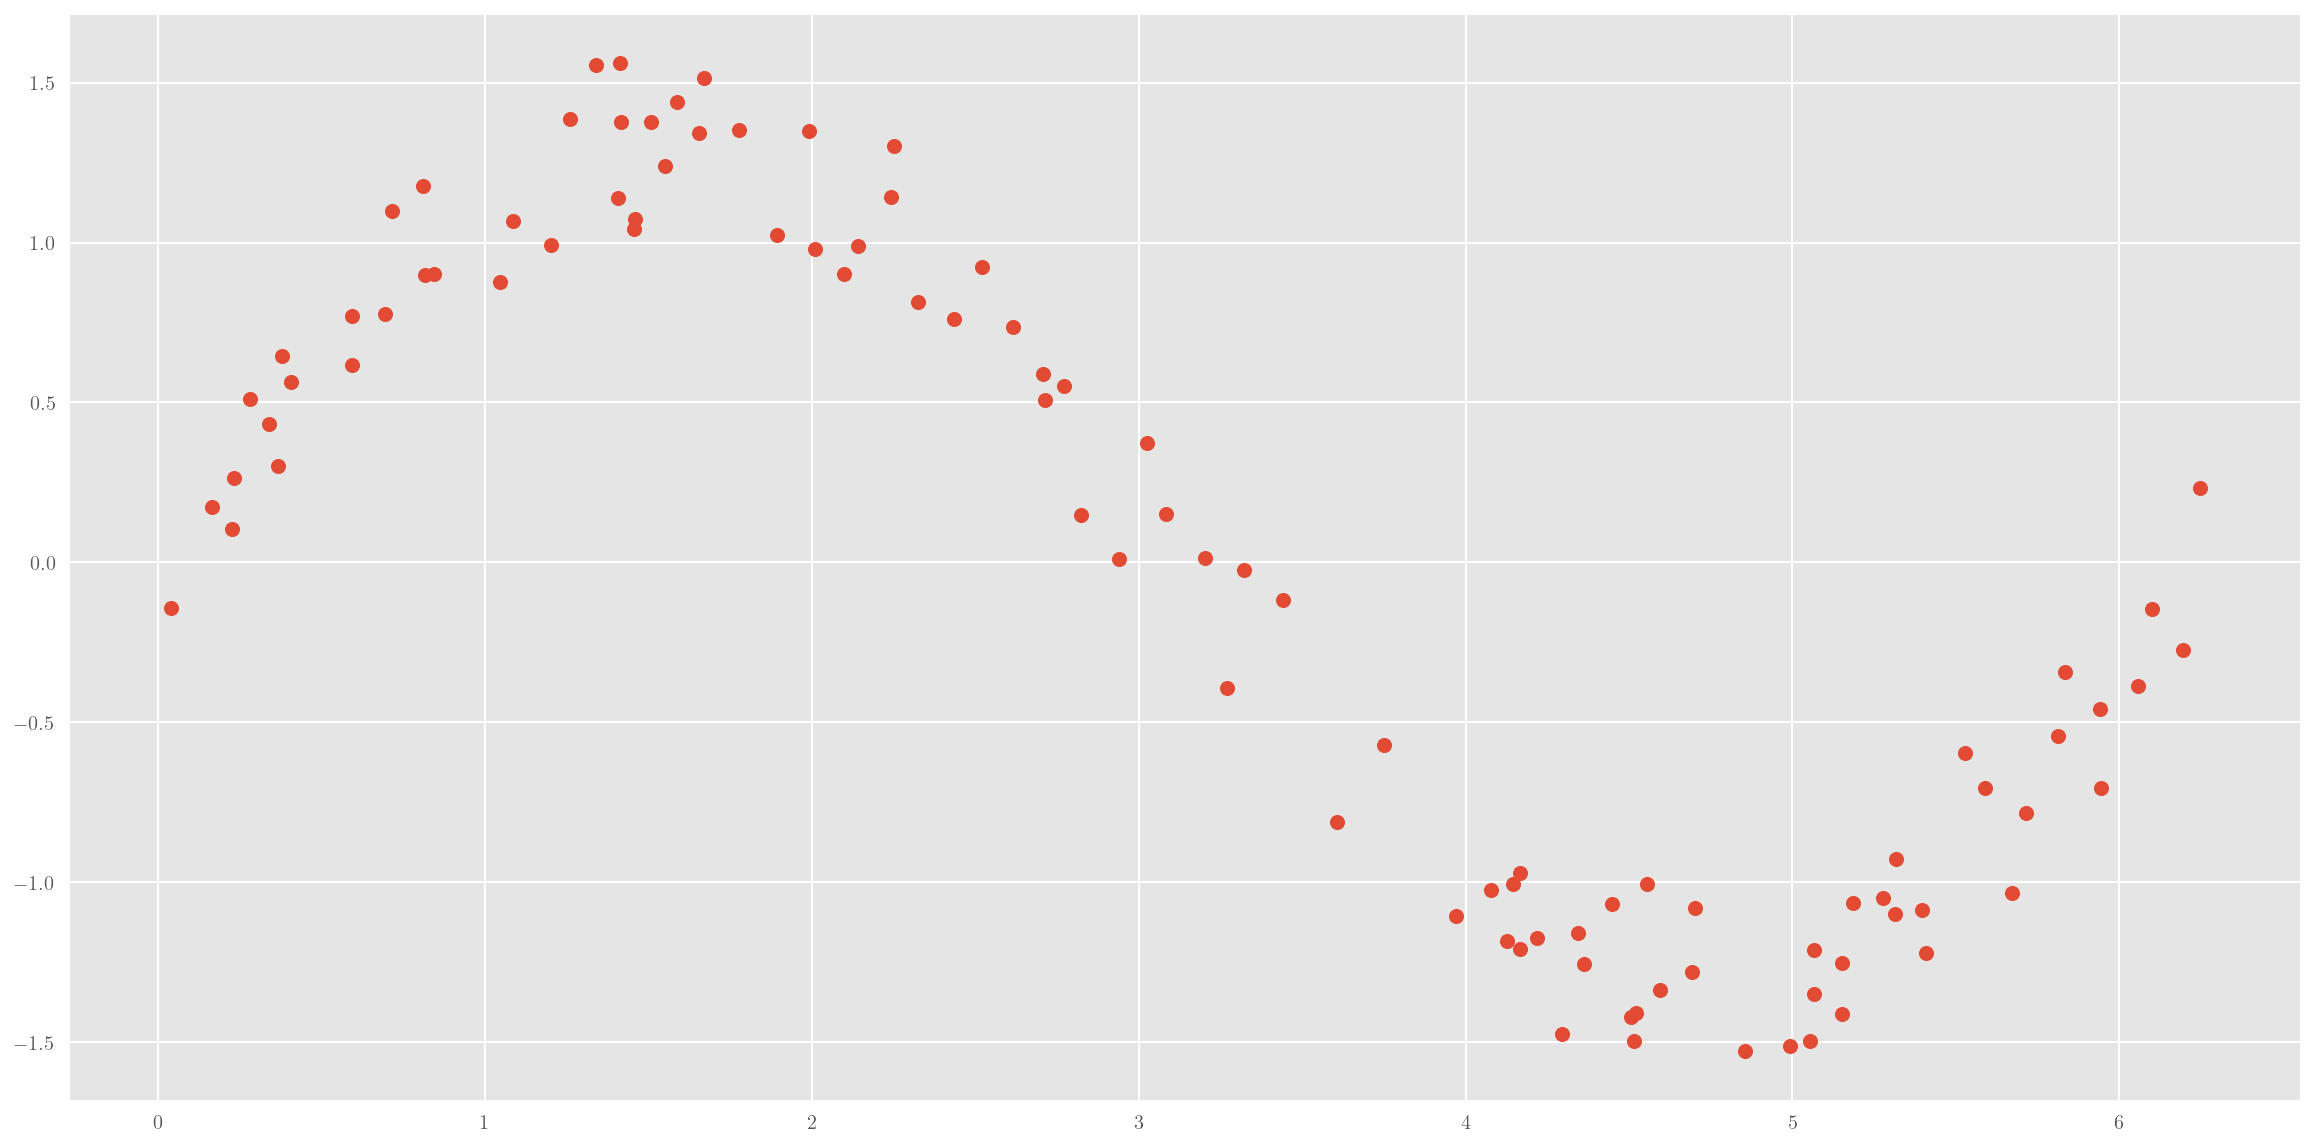

In [13]:
plt.scatter( df.x, df.y);

Since plotting is now integrated directly into the Pandas dataframe, we can equivalent call the one-liner below. By default, pandas will use `matplotlib` as its backend plotting engine.

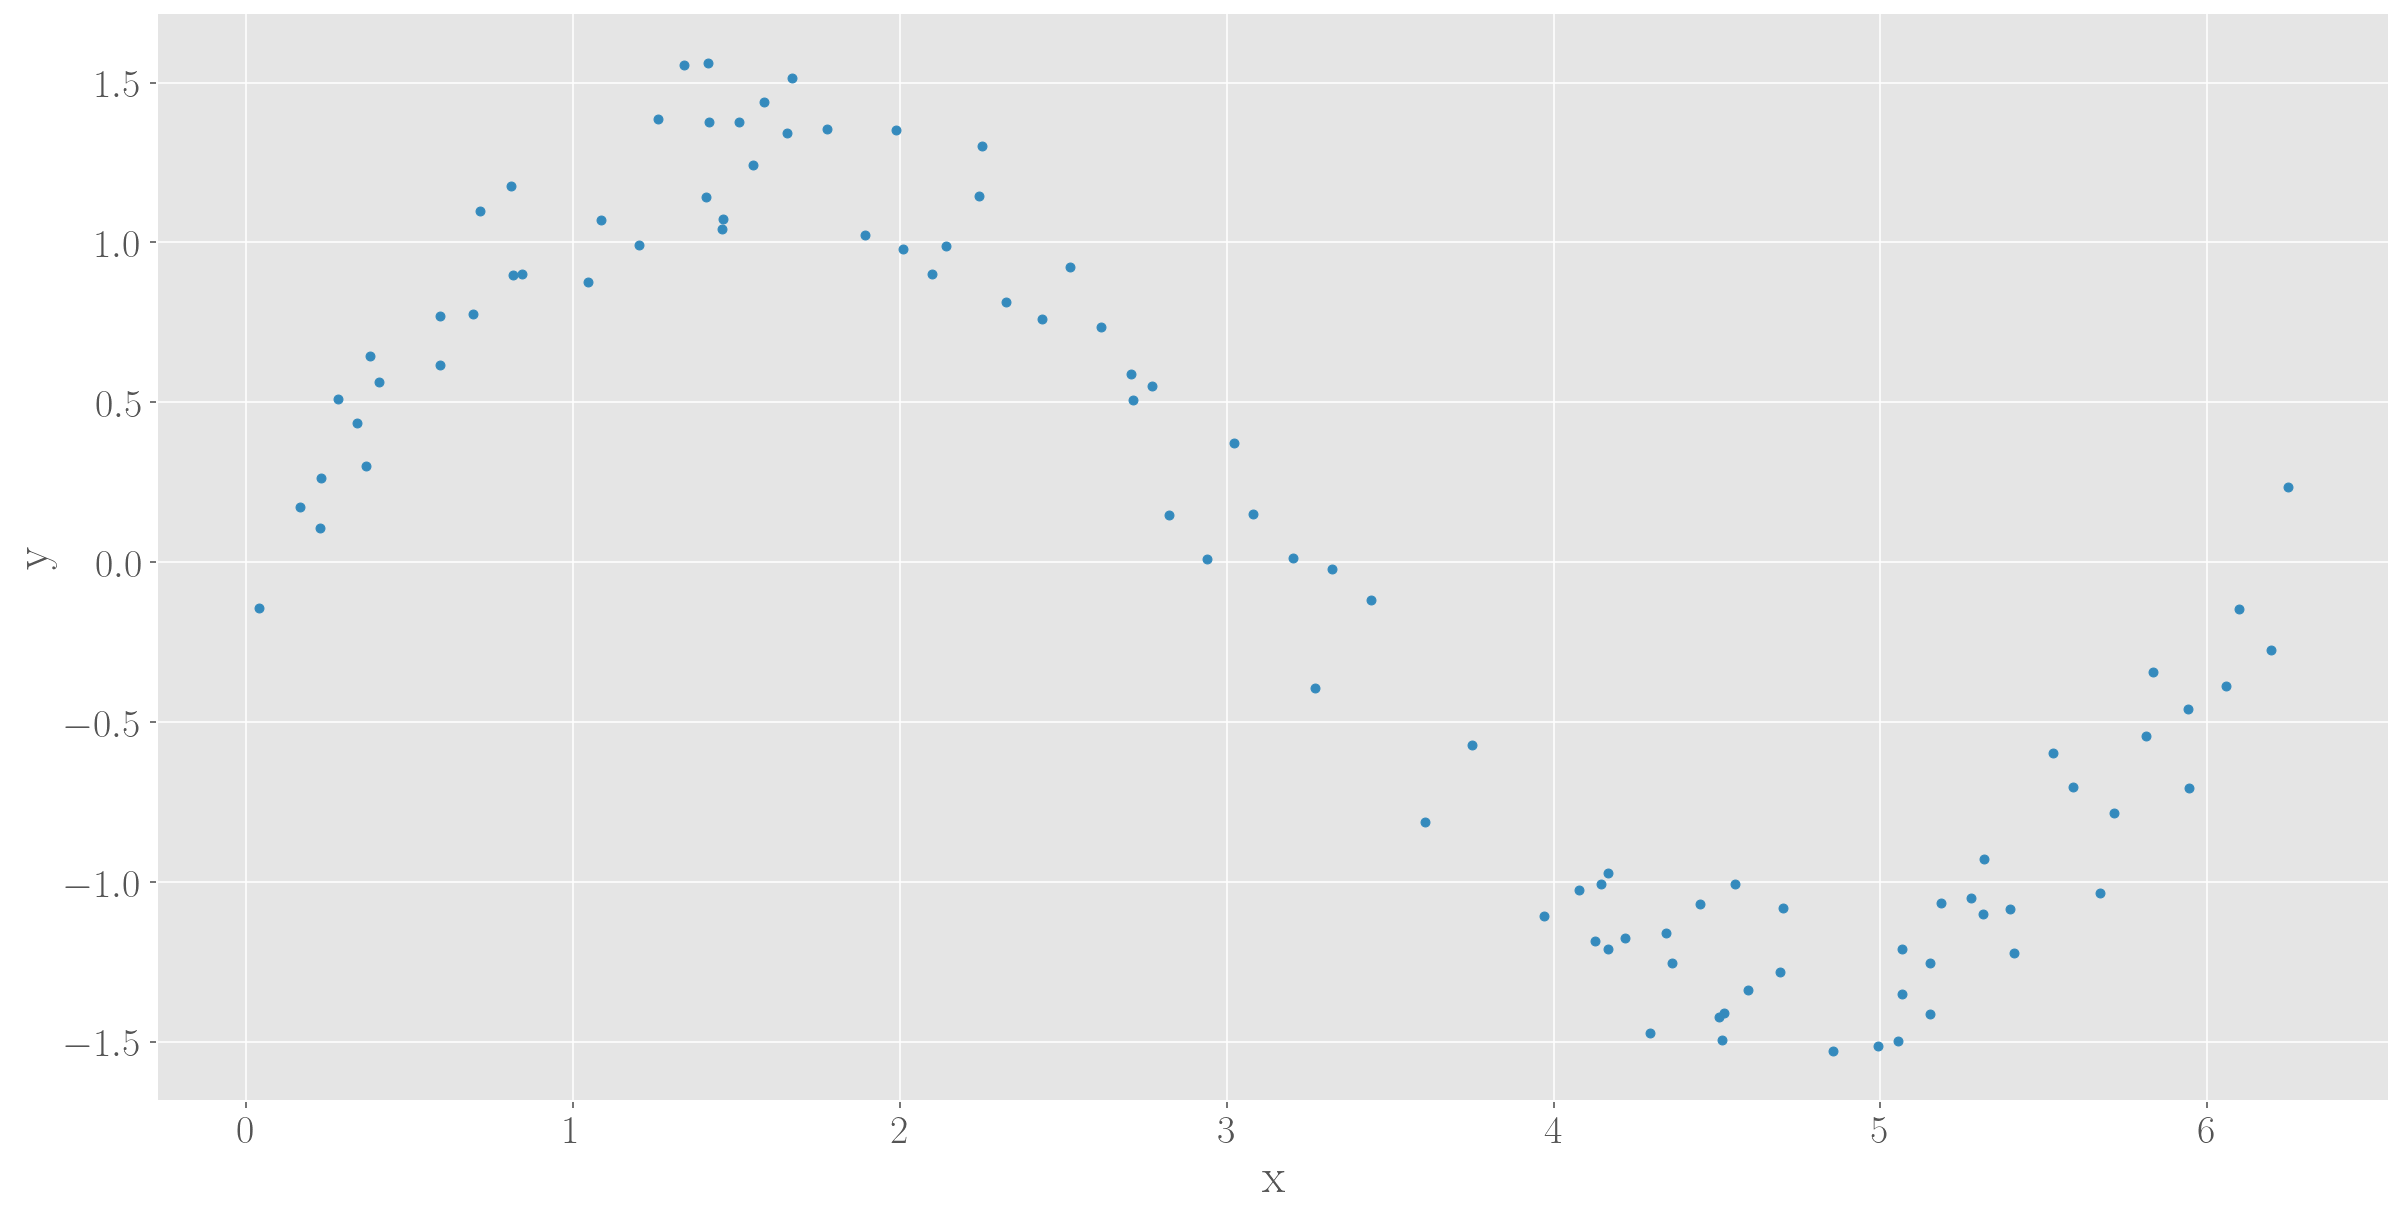

In [4]:
df.plot.scatter(x='x', y='y');

We could have alternatively called:

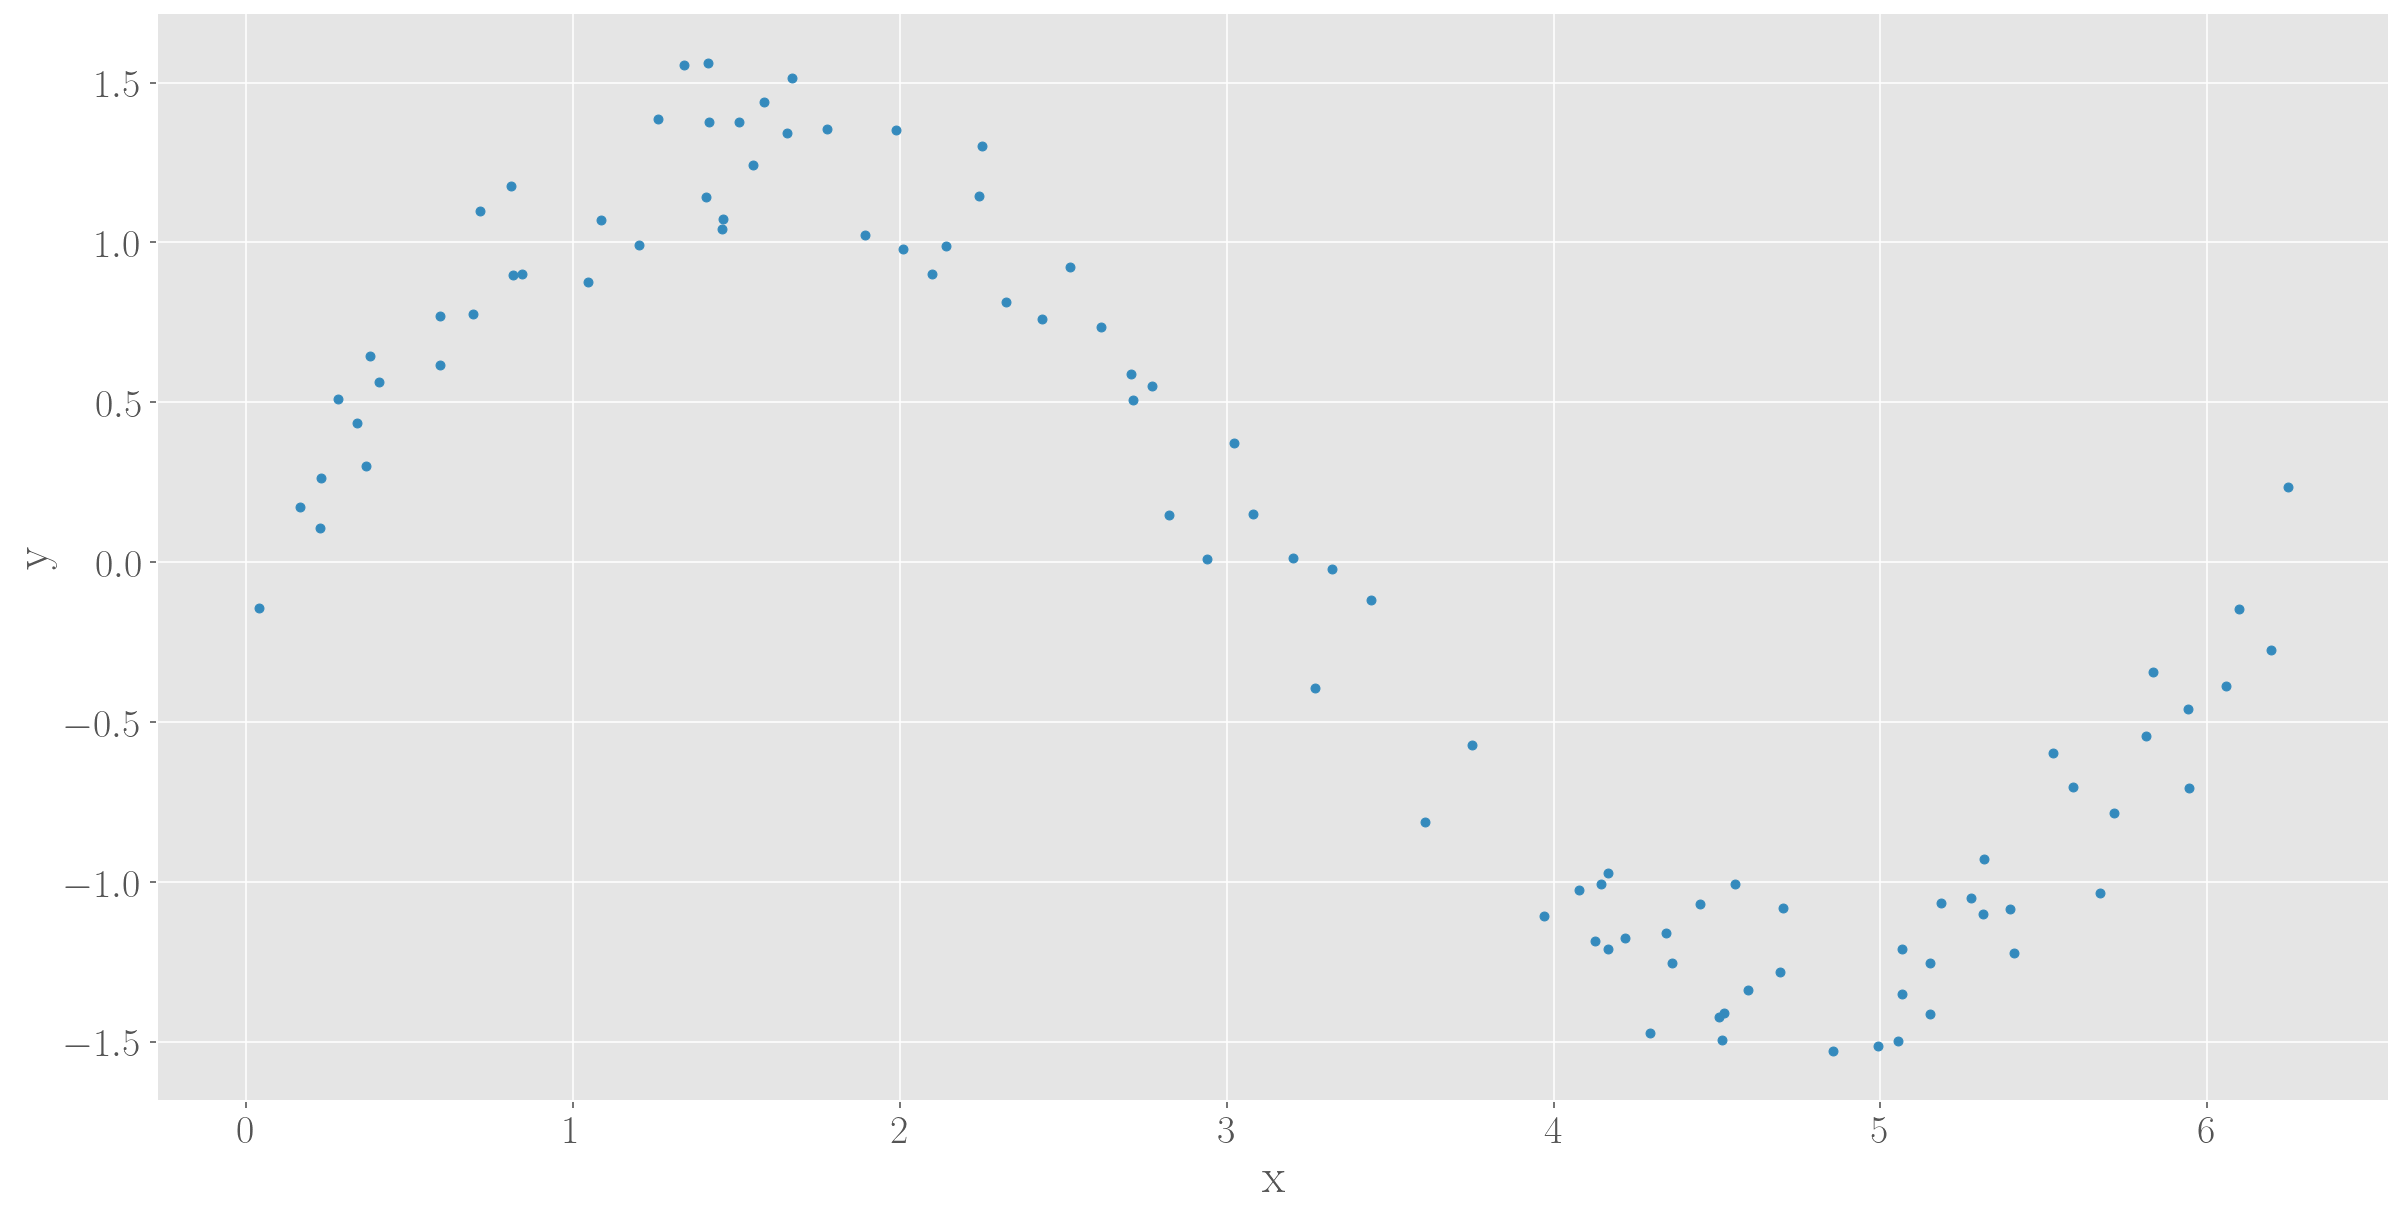

In [5]:
df.plot(kind = "scatter", x= "x", y="y");

To get the histogram of the variables in the dataframe:

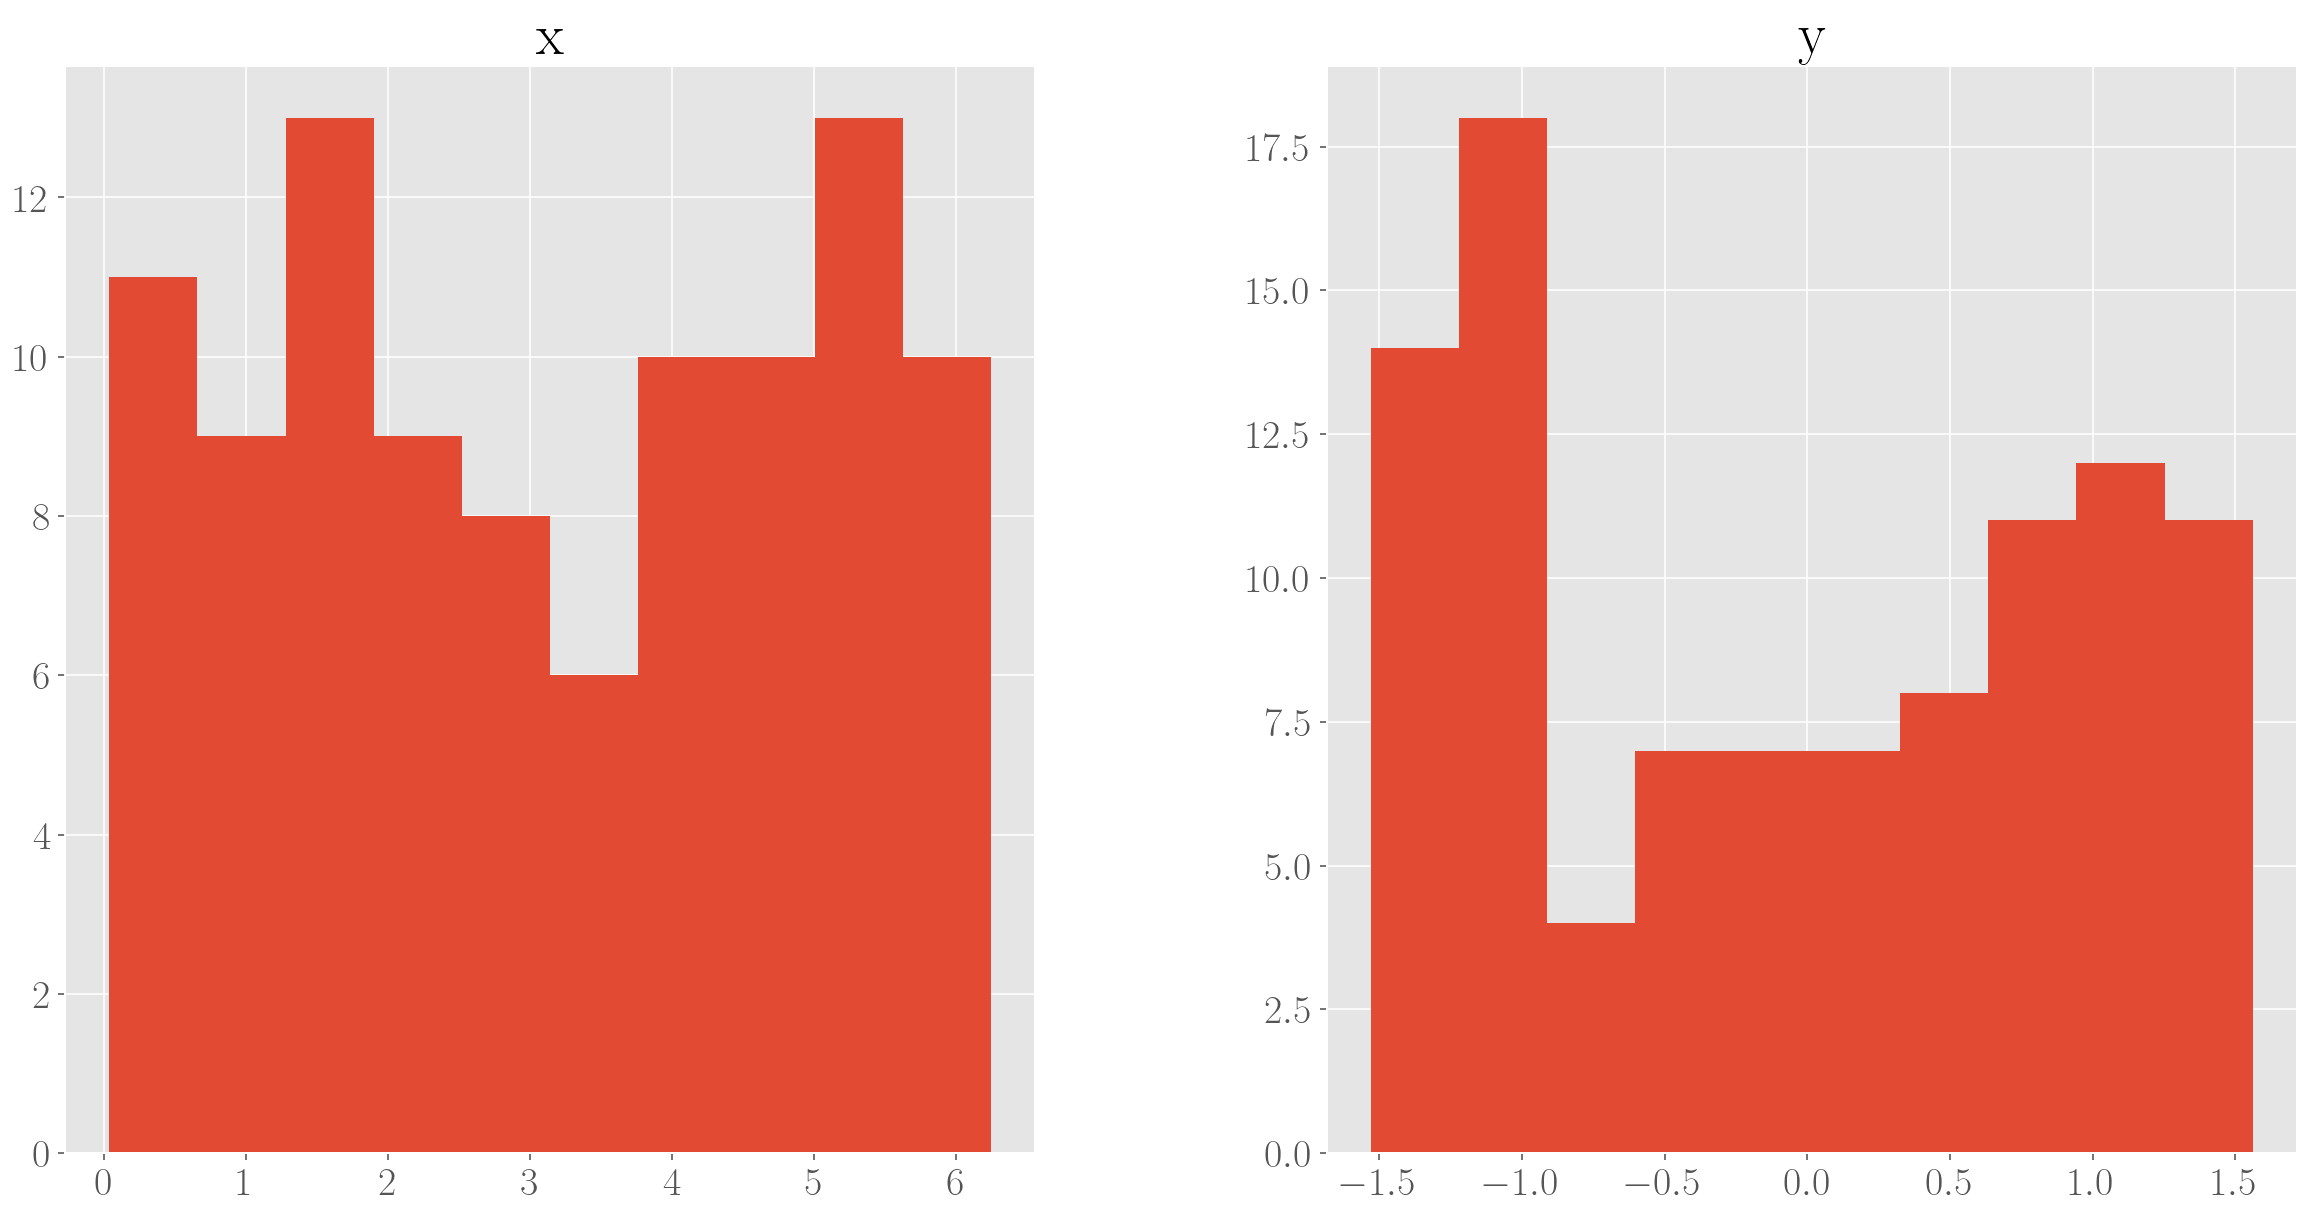

In [6]:
df.hist();

Alternately, use `matplotlib` directly:

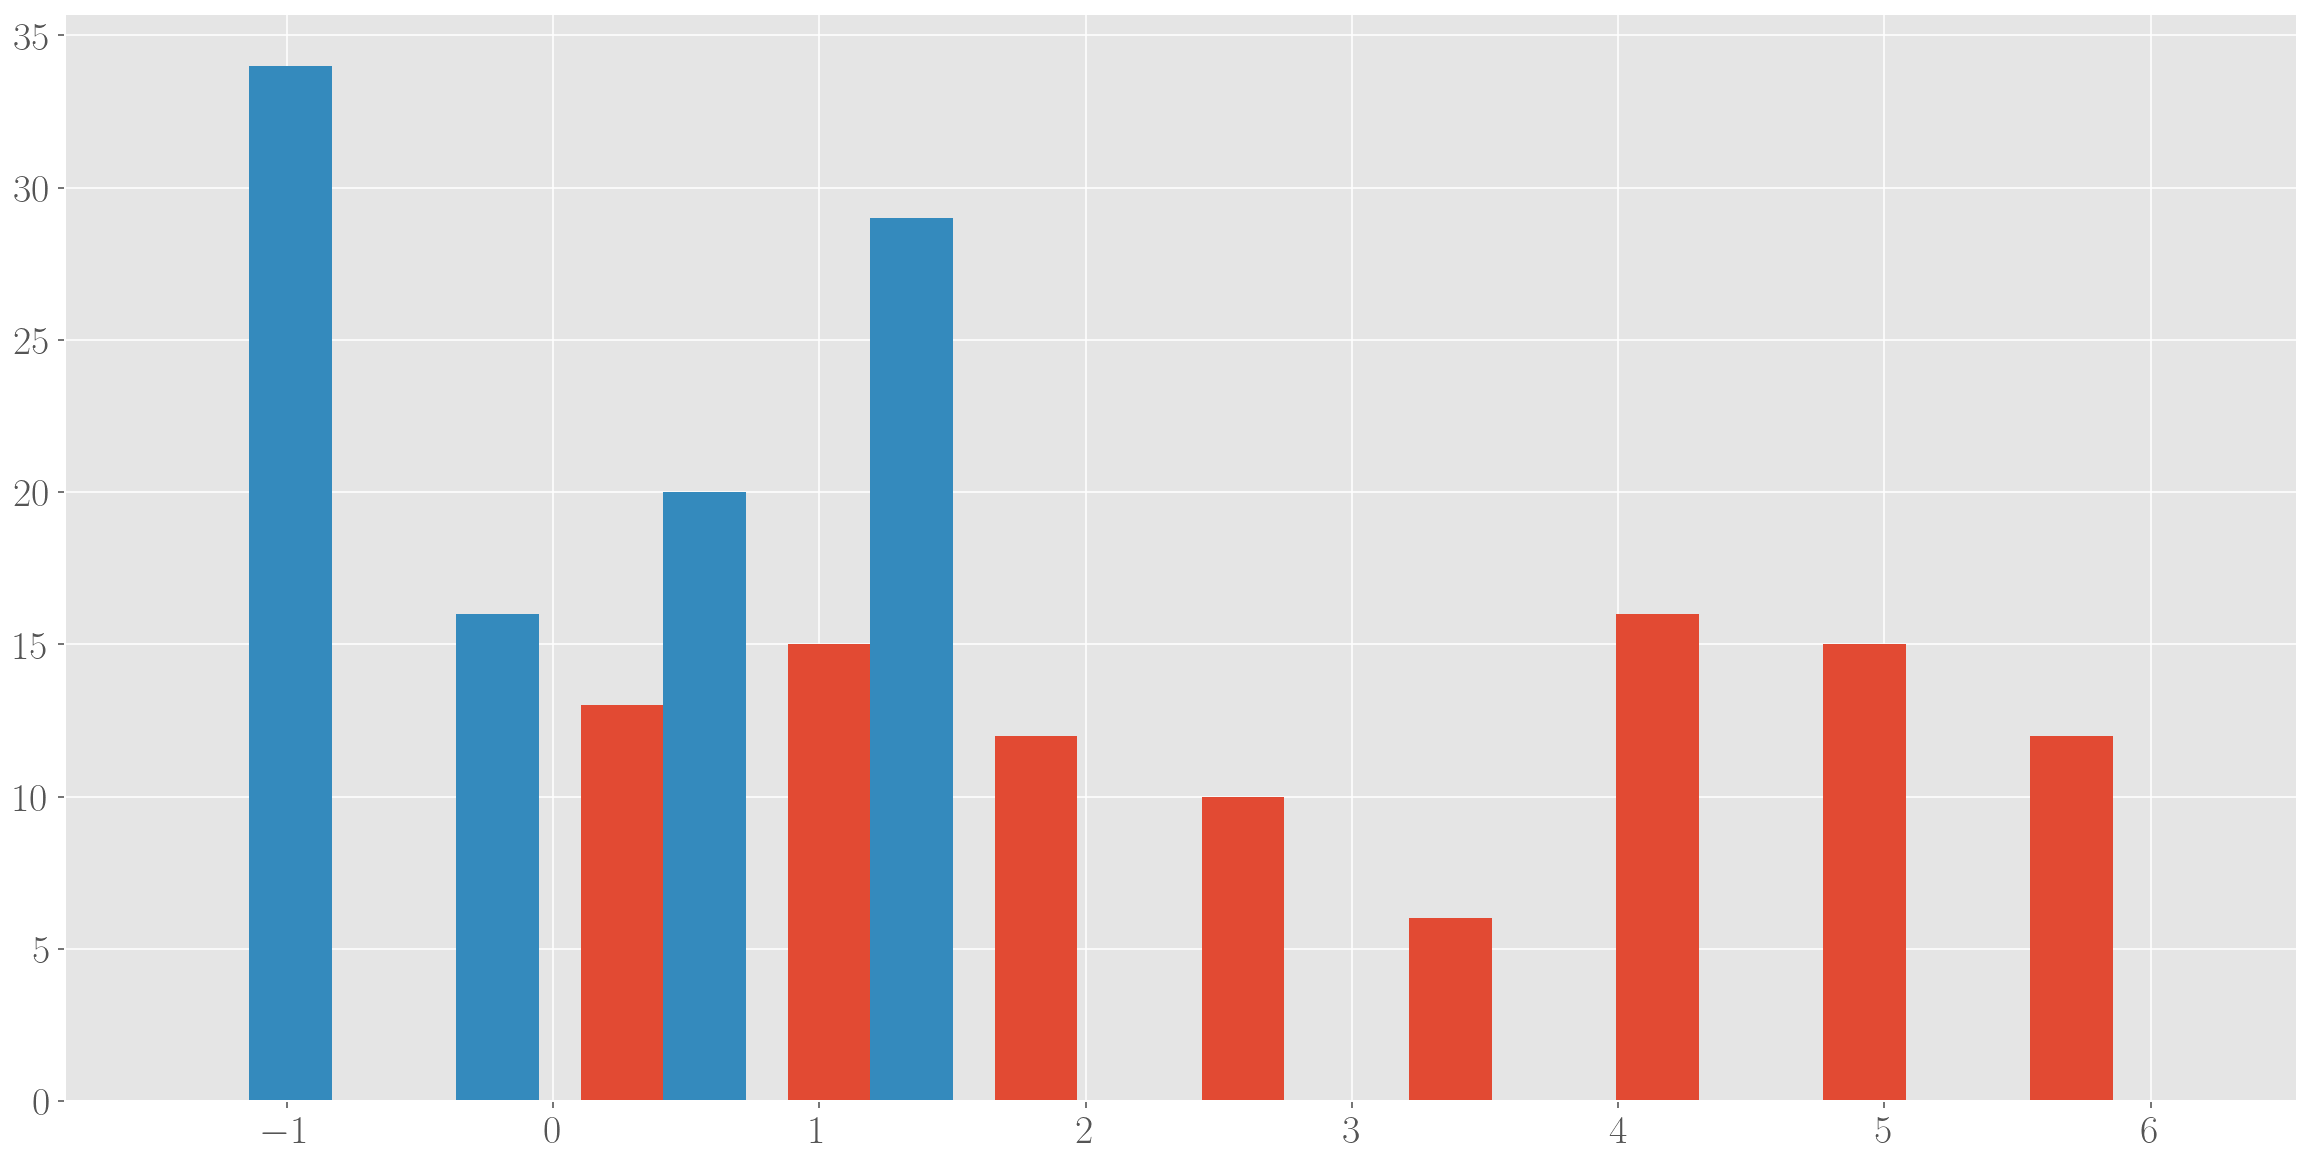

In [7]:
plt.hist(df);

What if we want to change the plotting backend of pandas to something else, say Bokeh? Make sure `bokeh` has been installed on your machine; if not run:

```!pip install pandas-bokeh```

In [8]:
from bokeh.io import output_notebook
output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')          # pandas_bokeh, plotly, etc       
df.plot.scatter(x='x', y='y');

Loading BokehJS ...

Resetting back to `matplotlib` backend.

In [9]:
pd.set_option('plotting.backend', 'matplotlib')

## Add some styling to the plot

Note how the `matplotlib` plots above are rather lacking in aethetics. Let us now style the scatter plot with a title and axes labels that look more publication quality:

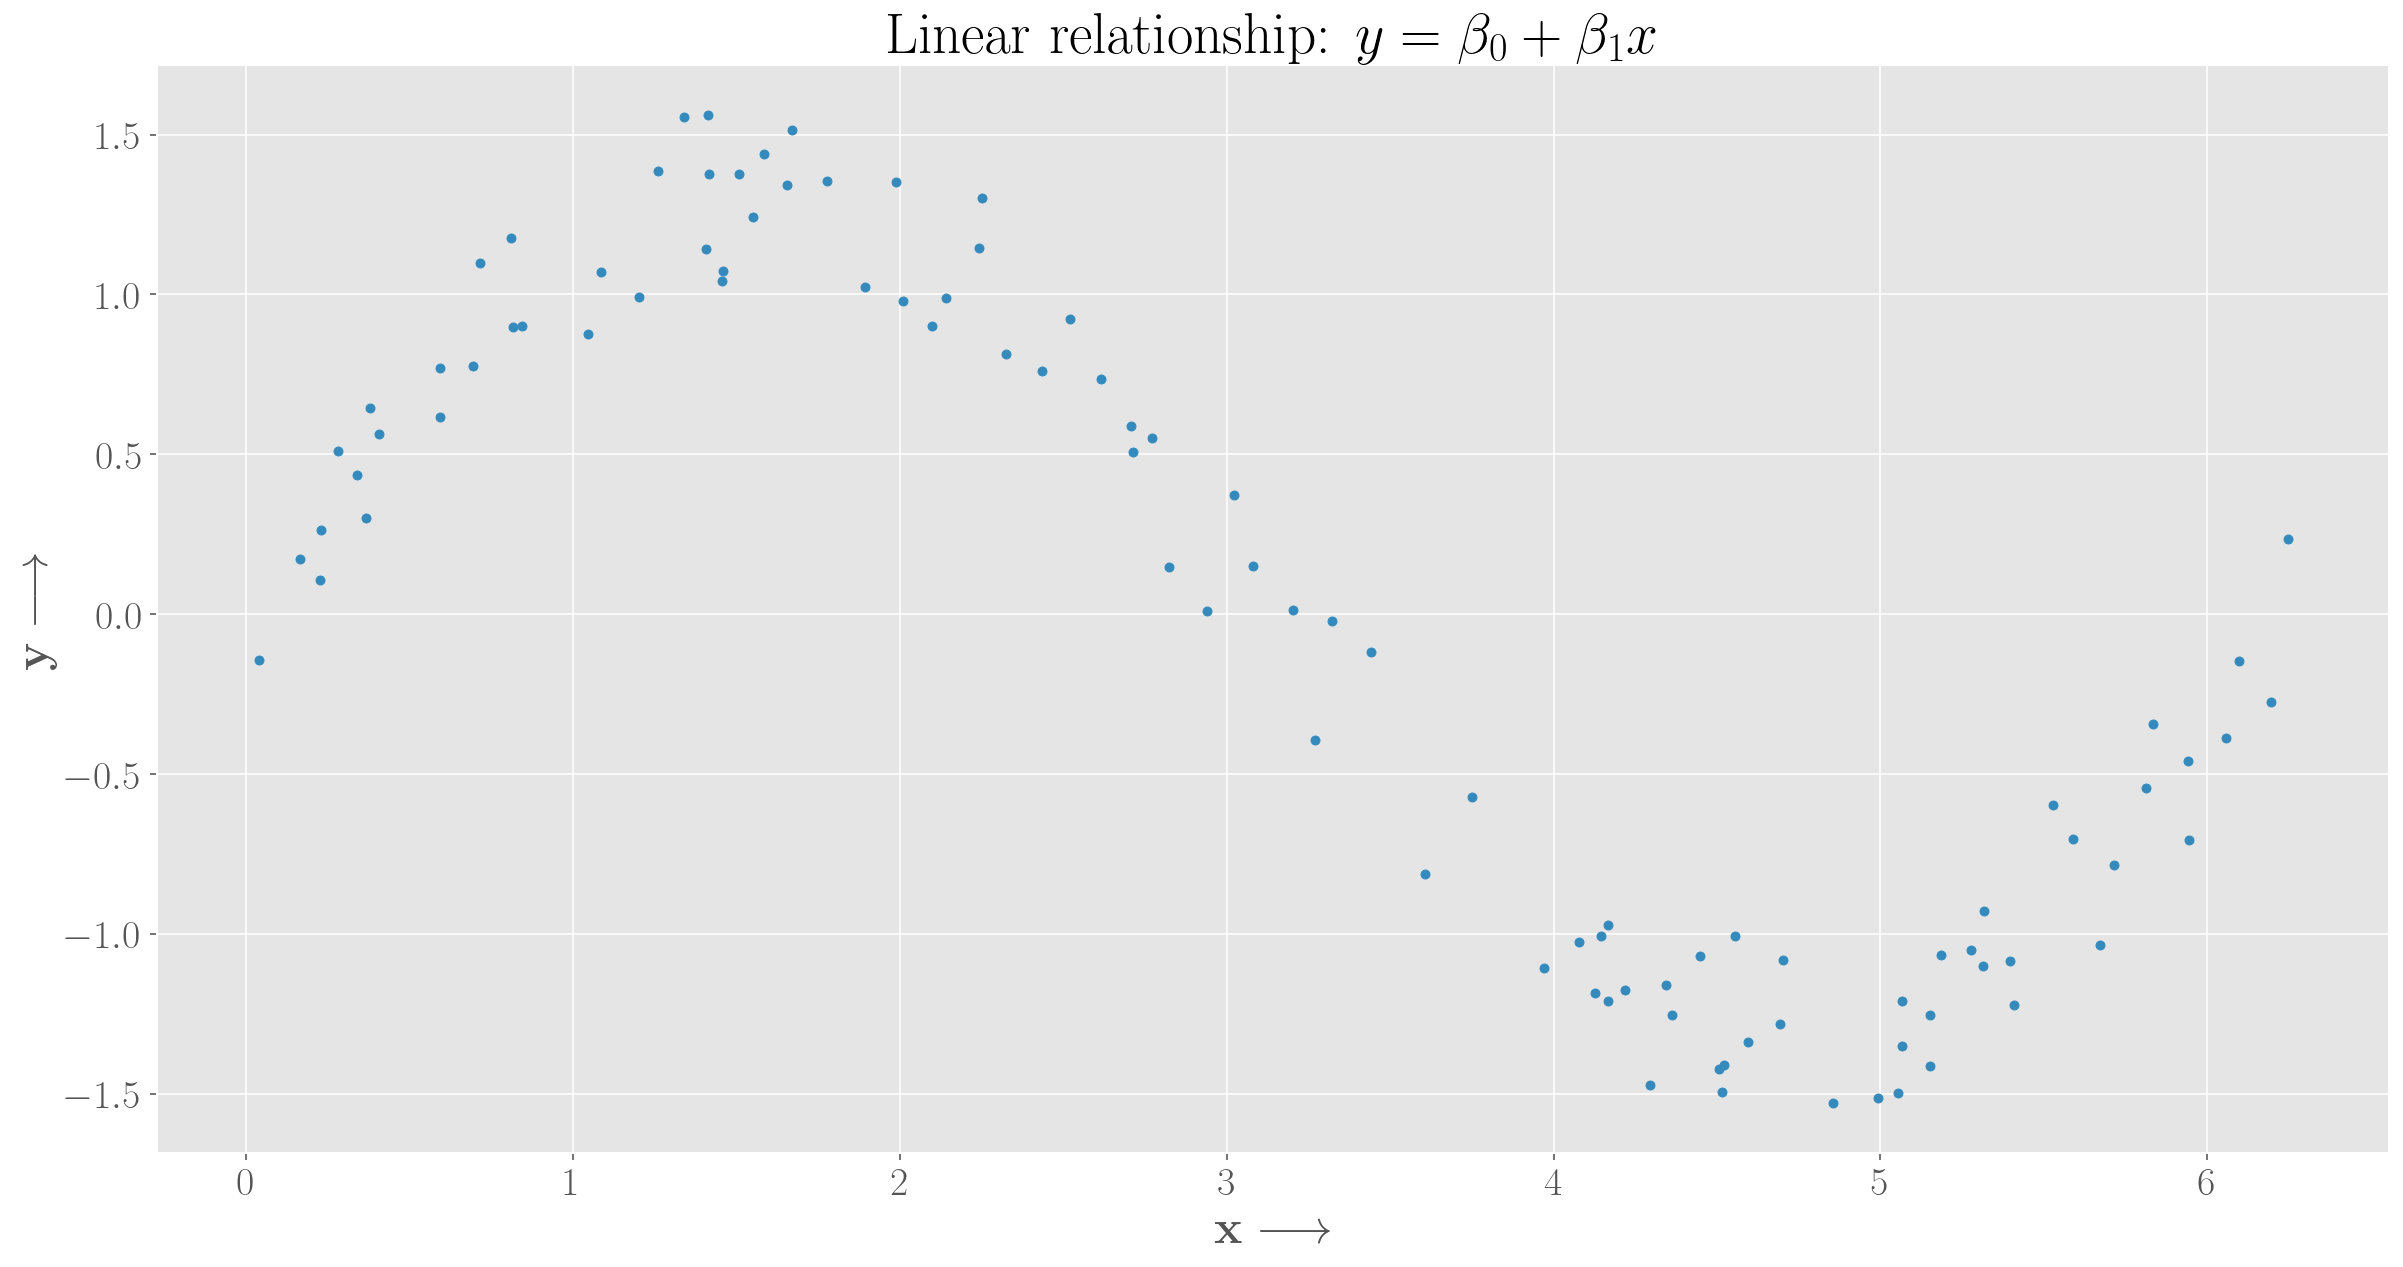

In [10]:
df.plot.scatter(x='x', y='y')
plt.xlabel(r'$\mathbf{x \longrightarrow}$');
plt.ylabel(r'$\mathbf{y \longrightarrow}$');
plt.title(r'Linear relationship: $y = \beta_0 + \beta_1 x$')
plt.show()

Let us also modify the points to be larger, and of a specific color.

<Figure size 2880x2160 with 0 Axes>

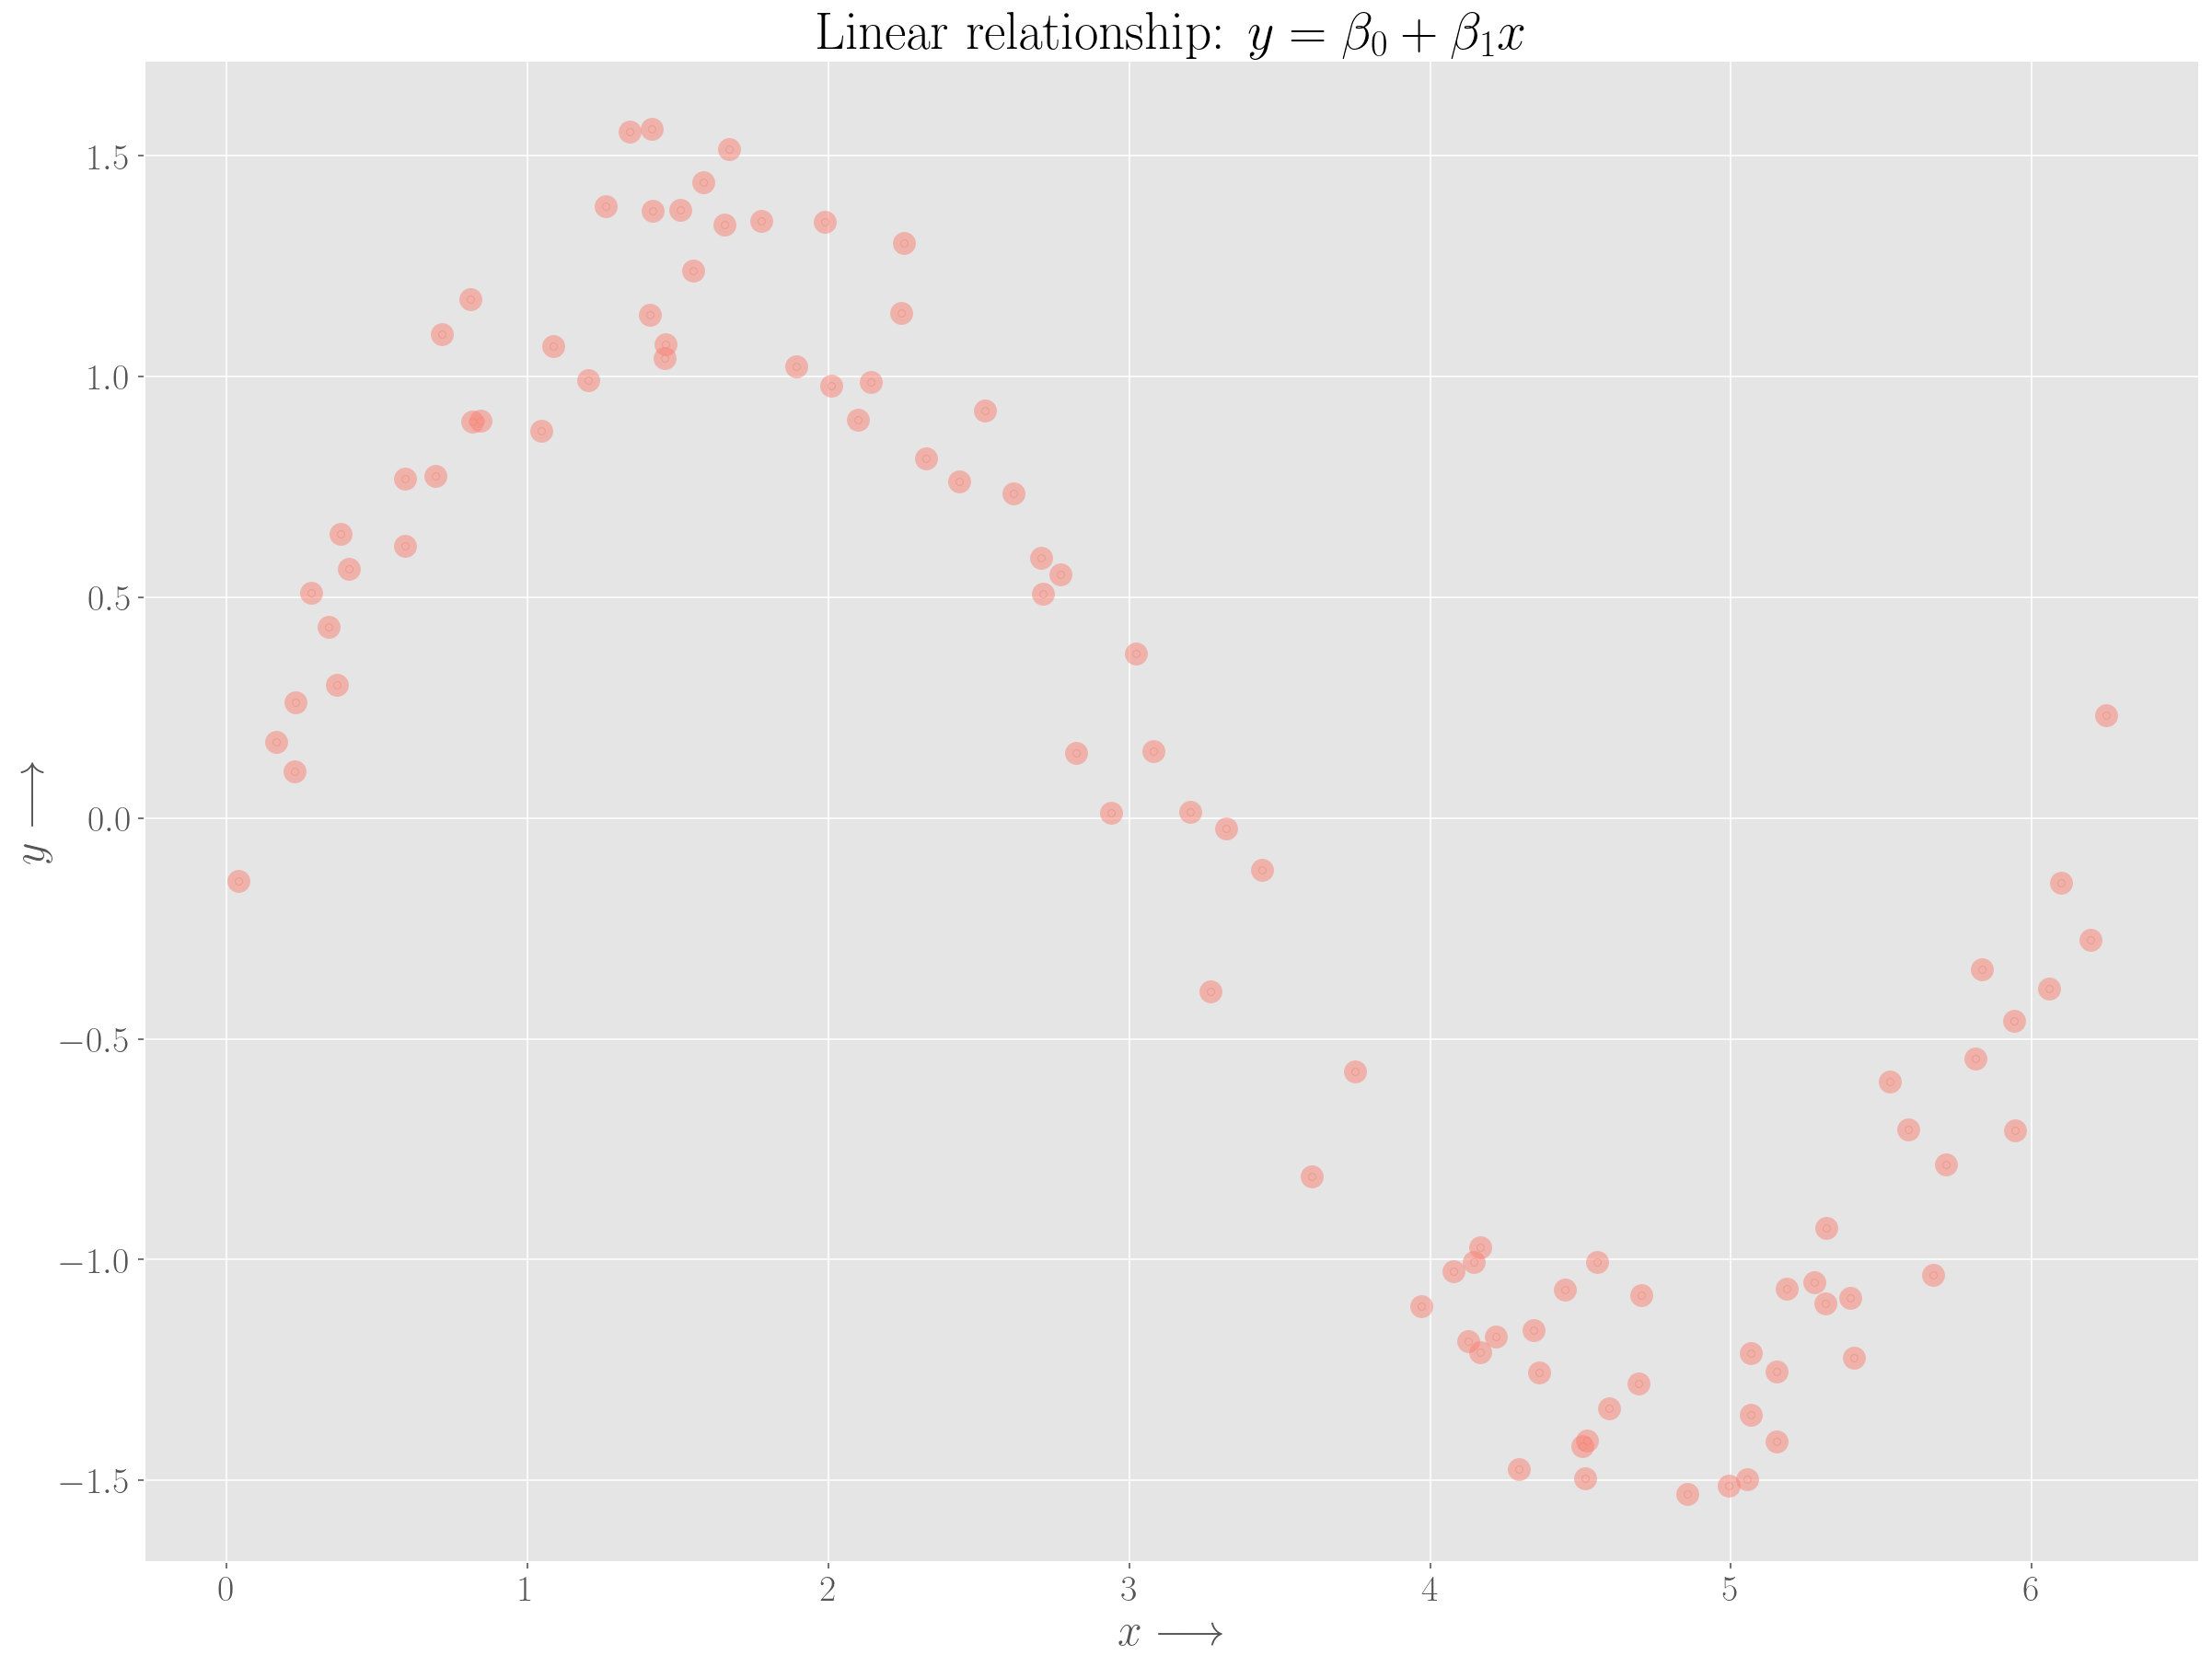

In [11]:
# Add a good labels, annotations and labels to the graph
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=20)

# First, set a custom size
plt.figure(figsize=(20, 15));
plt.rcParams['figure.figsize'] = '20,15'  # put this too if needed

# Next plot the scatter-plot with some style
df.plot.scatter( x= "x", 
                y="y", 
                color = "#FA8072", # use a salmon color, for example
                marker="o",        # try '*', '2', etc
                alpha=0.5,
                linewidths=8,
          
               );# plotting the dataframe

plt.title(r'Linear relationship: $y = \beta_0 + \beta_1 x$');
plt.xlabel(r'$x\longrightarrow$');   # specify the x-axis label
plt.ylabel(r'$y\longrightarrow$');  # specify the y-axis label

## Adding Annotations

Let us now add a few annotations to explain the plot.

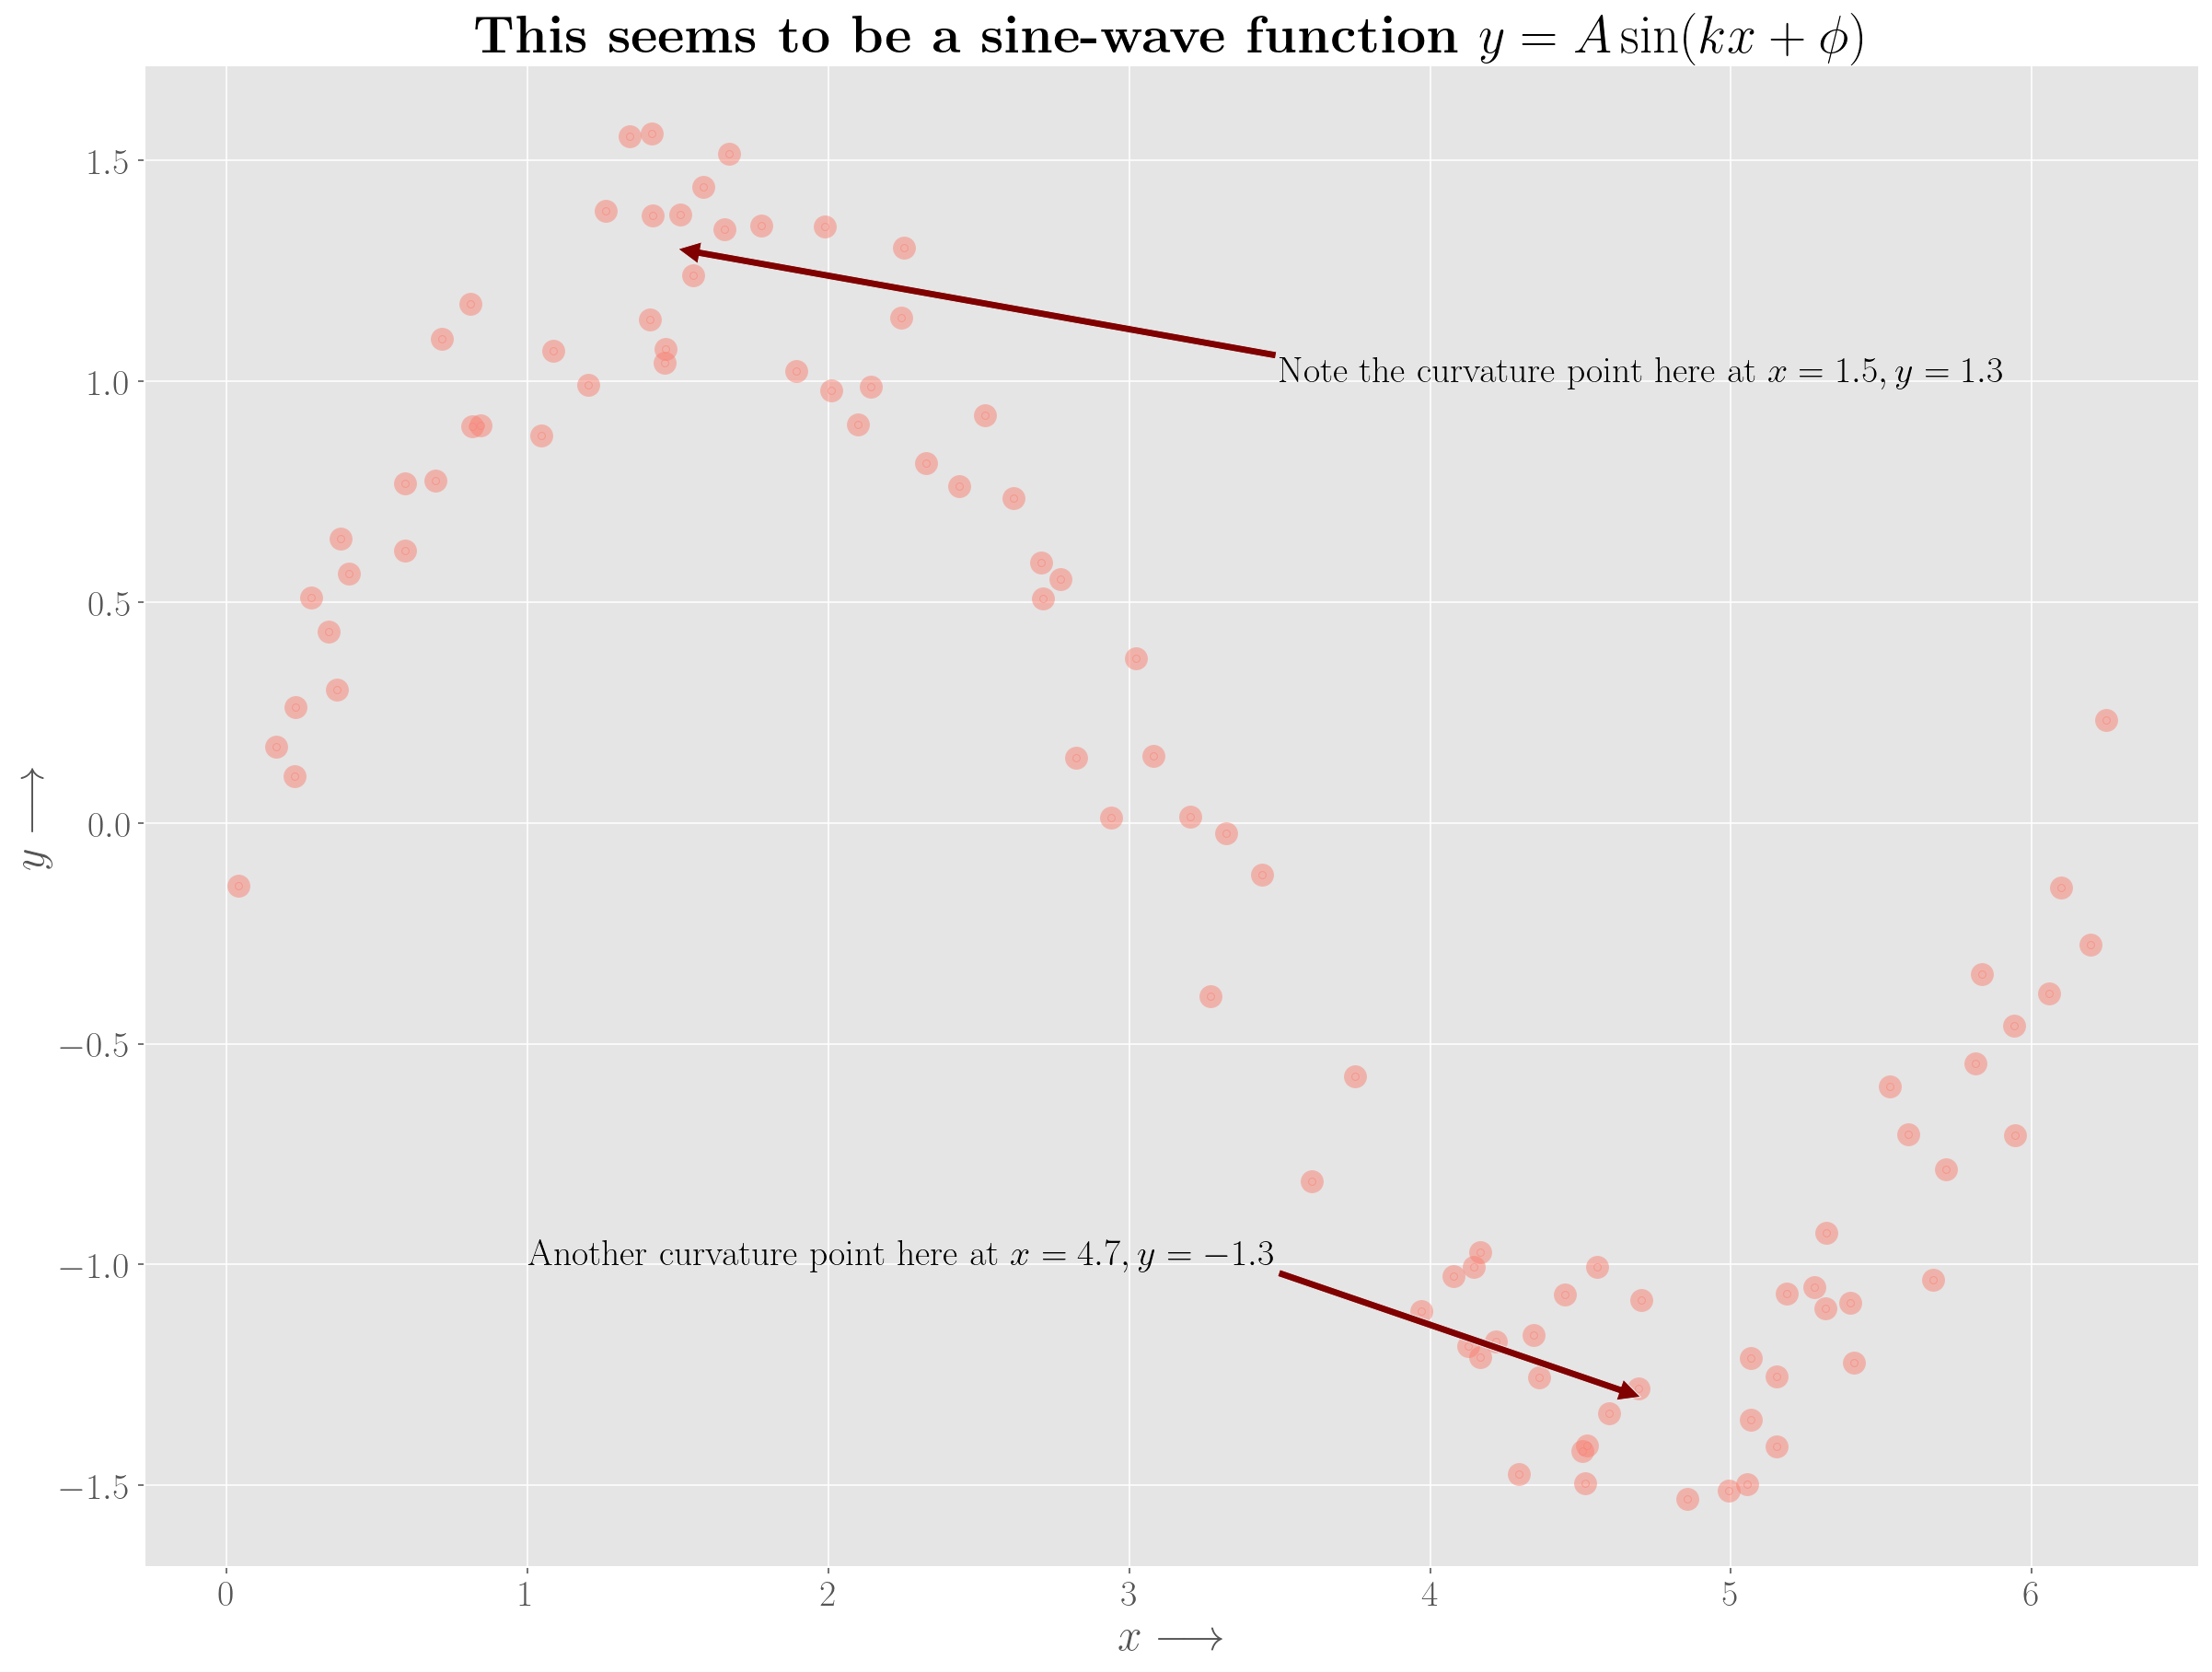

In [12]:
# Next plot the scatter-plot with some style
df.plot.scatter( x= "x", 
                y="y", 
                color = "#FA8072", # use a salmon color, for example
                marker="o",        # try '*', '2', etc
                alpha=0.5,
                linewidths=8,
          
               );# plotting the dataframe

plt.title(r'Linear relationship: $y = \beta_0 + \beta_1 x$');
plt.xlabel(r'$x\longrightarrow$');   # specify the x-axis label
plt.ylabel(r'$y\longrightarrow$');  # specify the y-axis label

#
# Add the annotations.
#
plt.annotate (r'Note the curvature point here at $x=1.5, y=1.3$', 
              xy=(1.5, 1.3),     # where to place the tip
              xytext=(3.5, 1),   # where to place the text
              arrowprops = dict(facecolor='maroon', width=4,)
             ) 

plt.annotate (r'Another curvature point here at $x=4.7, y=-1.3$', 
              xy=(4.7, -1.3),     # where to place the tip
              xytext=(1, -1), # where to place the text
              arrowprops = dict(facecolor='maroon', width=4, connectionstyle="arc3")
             ) 
plt.title(r'\textbf{This seems to be a sine-wave function $ y = A \sin(k x + \phi)$ }');


# Creating sub-plots

To create subplots is quite straightforward. First, determine the number of rows and columns (m,n) and then for each sub-plot, specify where it lands.


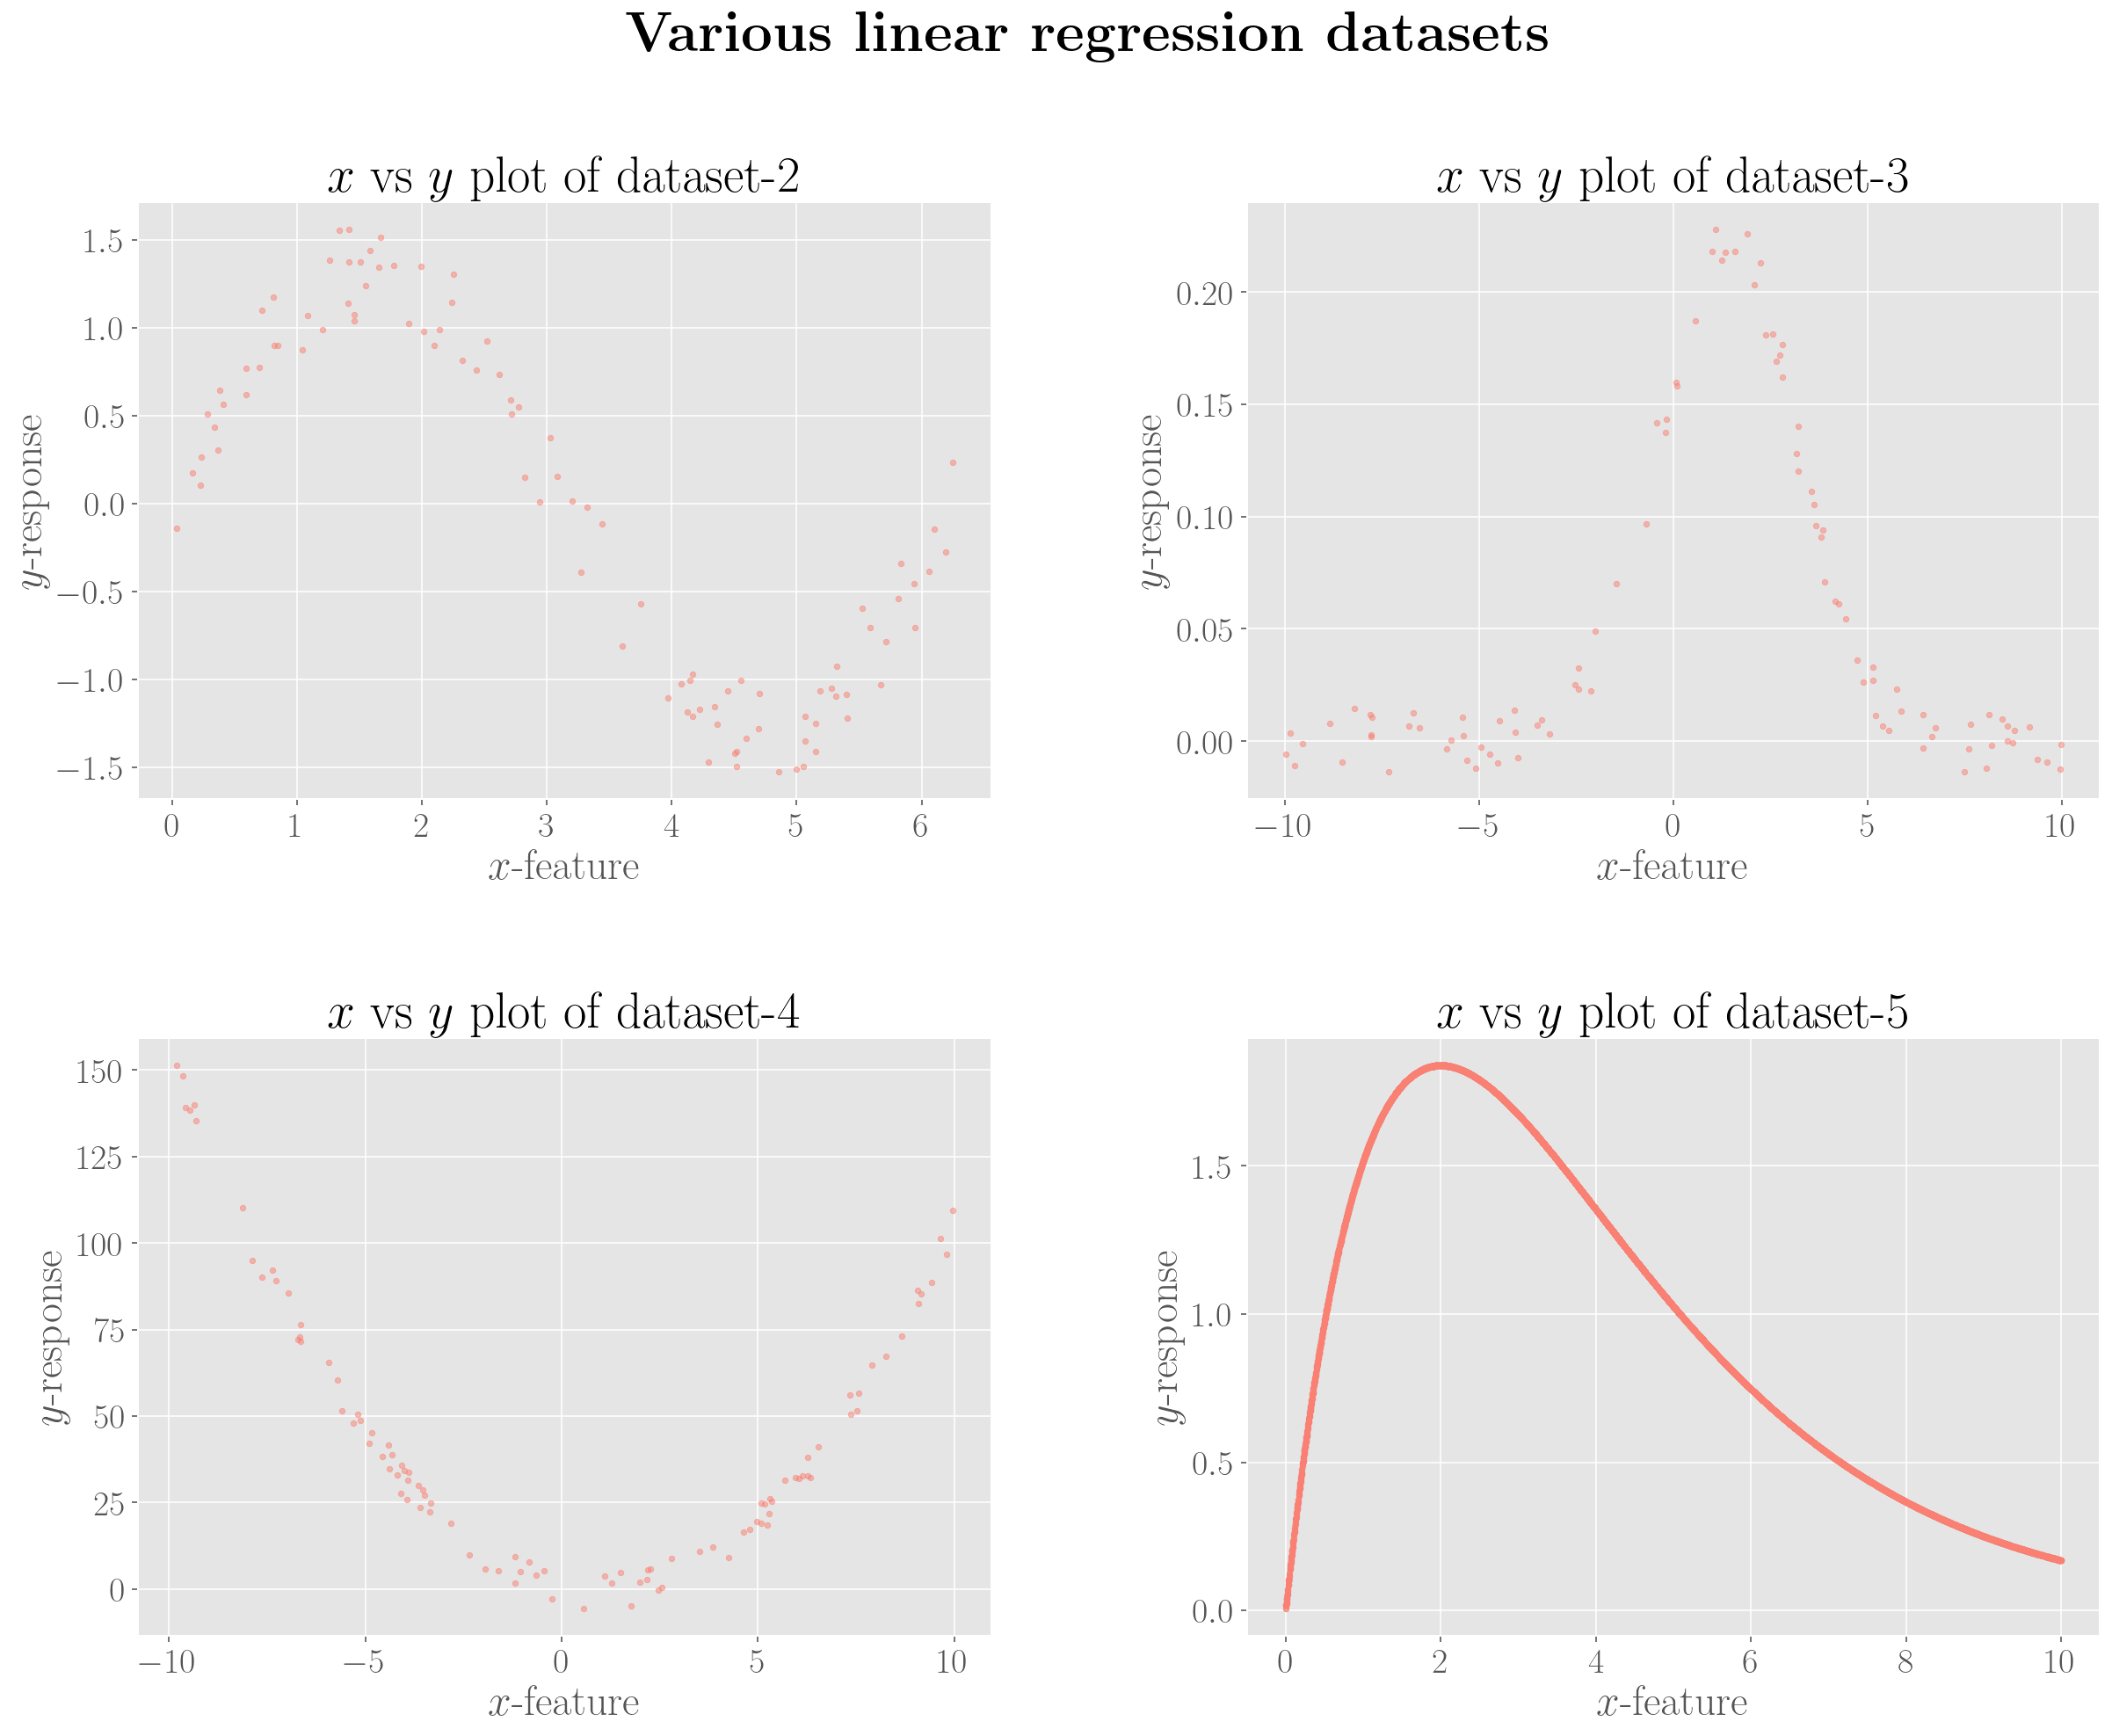

In [13]:
fig = plt.figure()
fig.suptitle(r'\textbf{Various linear regression datasets}', size=32)
plt.subplots_adjust(hspace=0.4,  # vertical spacing between subplots
                    wspace=.3)   # horizontal spacing between subplots
#
# Loop through the datasets from 2 to 5, and plot each
for i in range (2,6):
    csv    = "https://raw.githubusercontent.com/supportvectors/ml-100/master/dataset-{}.csv".format(i)
    df     = pd.read_csv(csv)
    fIndex = i-1
    ax1    = fig.add_subplot(2,2,fIndex)
    ax1.set_title(r' $x$ vs $y$ plot of dataset-{}'.format(i))
    ax1.set_xlabel(r'$x$-feature')
    ax1.set_ylabel(r'$y$-response')
    ax1.scatter (df.x, df.y, s=10, alpha=0.5, color='salmon')
    ax1.margins = (10,10)

# Finally, show the whole plot    
plt.show()


# Histograms of all the datasets as a subplot

draw the histogram of some datasets below as subplots:

The data-files are:
    * normal.txt
    * lognormal.txt
    * beta.txt
    * gamma.txt
    * poisson.txt

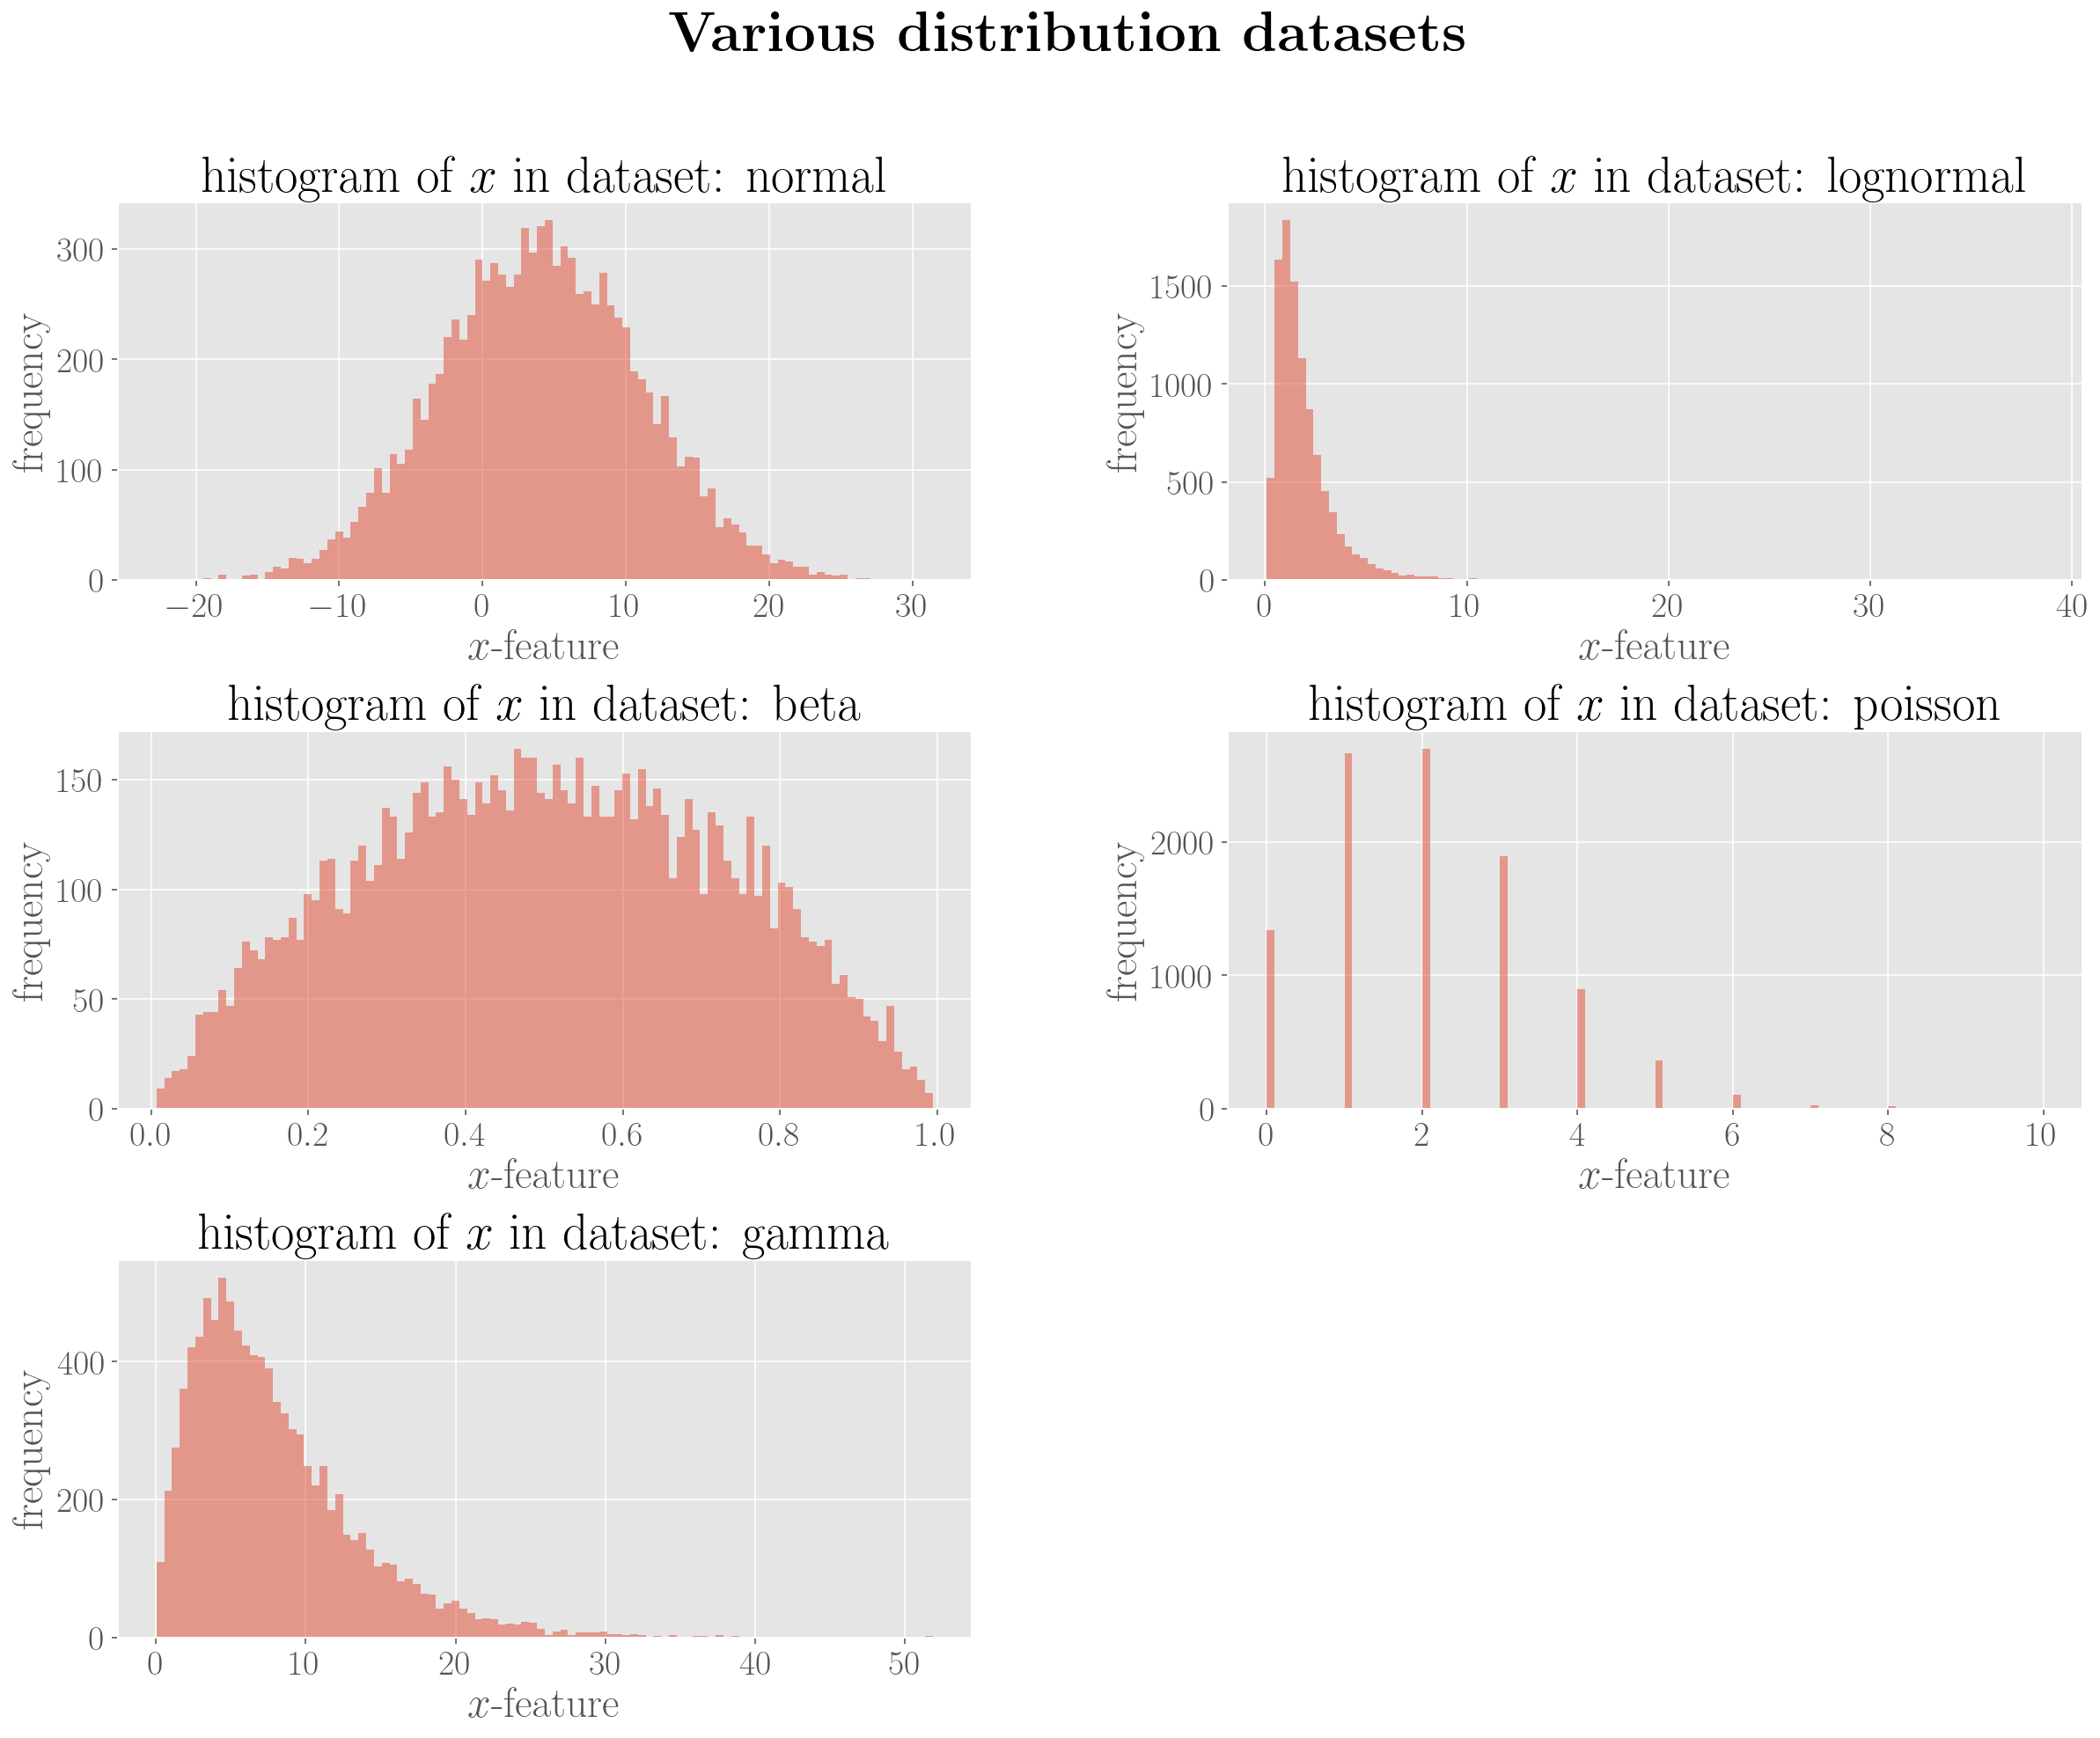

In [14]:
fig = plt.figure()
fig.suptitle(r'\textbf{Various distribution datasets}', size=32)
plt.subplots_adjust(hspace=0.4,  # vertical spacing between subplots
                    wspace=.3)   # horizontal spacing between subplots
#
# Loop through the datasets from 2 to 5, and plot each
datasets = ["normal", "lognormal", "beta", "poisson", "gamma"]
fIndex=1
for dataset in datasets:
    filename = "{}.txt".format(dataset)
    data = pd.read_csv(filename)
    data.columns = ['x']
    ax1    = fig.add_subplot(3,2,fIndex)
    ax1.set_title(r'histogram of $x$ in dataset: {}'.format(dataset))
    ax1.set_xlabel(r'$x$-feature')
    ax1.set_ylabel(r'frequency')
    ax1.hist(data.x, bins=100, alpha=0.5)
    ax1.margins = (10,10)
    fIndex +=1

# Finally, show the whole plot    
plt.show()
